In [1]:
import lightkurve as lk
import matplotlib as mpl
import numpy as np

import tessbkgd

In [2]:
%pylab inline --no-import-all
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
mpl.rcParams['font.size']=22              #10 
mpl.rcParams['savefig.dpi']= 300             #72 
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']

Populating the interactive namespace from numpy and matplotlib


We're going to choose 𝜏 Ceti as our example for background corrections because of a feature in the light curve noted by Eisner et al. (2019) https://ui.adsabs.harvard.edu/abs/2019RNAAS...3..145E/abstract

In [3]:
target = 'tau Cet'

In [4]:
search = lk.search_lightcurvefile(target)
search

#,observation,target_name,productFilename,distance
0,TESS Sector 3,419015728,tess2018263035959-s0003-0000000419015728-0123-s_lc.fits,0.0


In [5]:
lc = search.download()

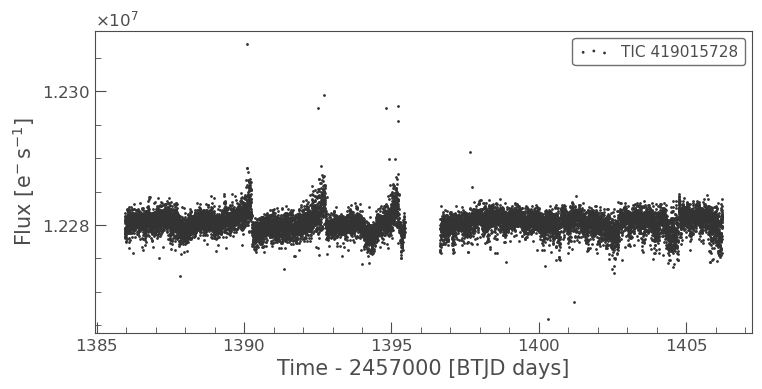

In [6]:
lc.PDCSAP_FLUX.scatter();

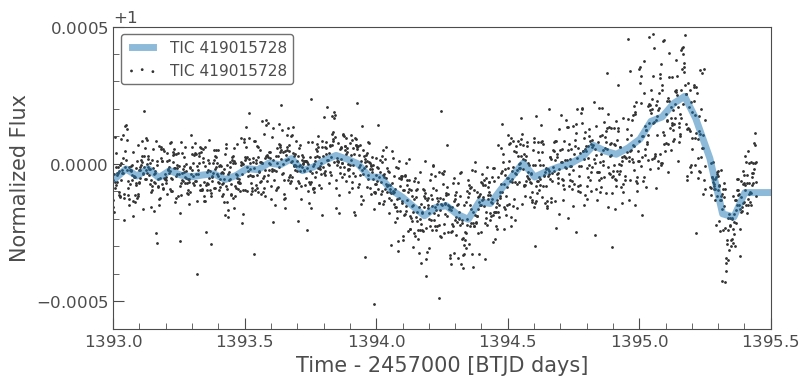

In [7]:
lc.PDCSAP_FLUX.normalize().scatter()
ax=plt.gca()

lc.PDCSAP_FLUX.normalize().bin(binsize=30).plot(ax=ax,linewidth=5,c='C0',alpha=0.5)
plt.xlim(1393,1395.5)
plt.ylim(0.9994,1.0005);

In [40]:
search = lk.search_targetpixelfile(target)
tpf = search.download();

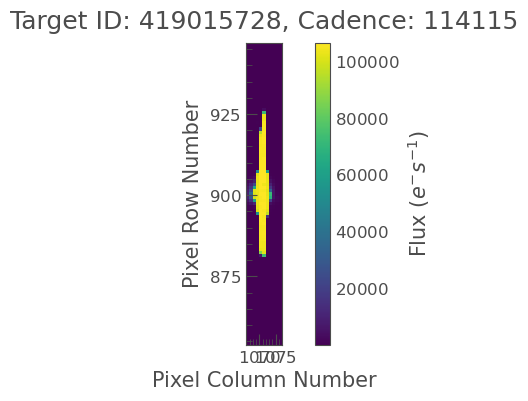

In [11]:
tpf.plot();

In [12]:
tpf.interact();

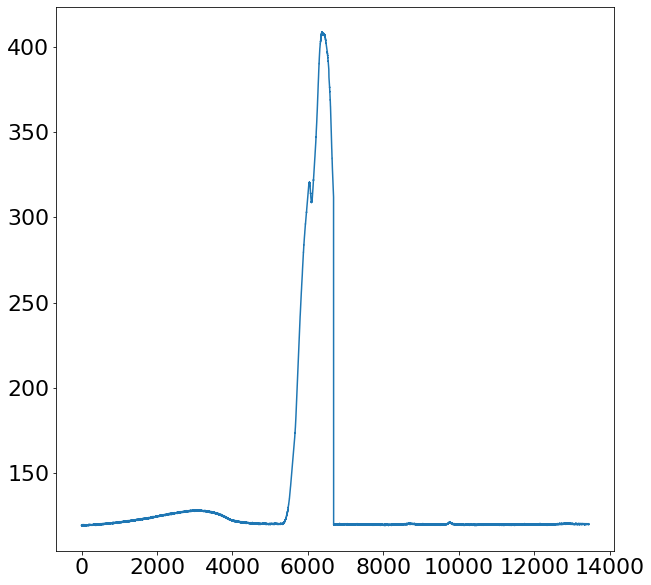

In [17]:
plt.plot(tpf.flux_bkg[:,0,0])

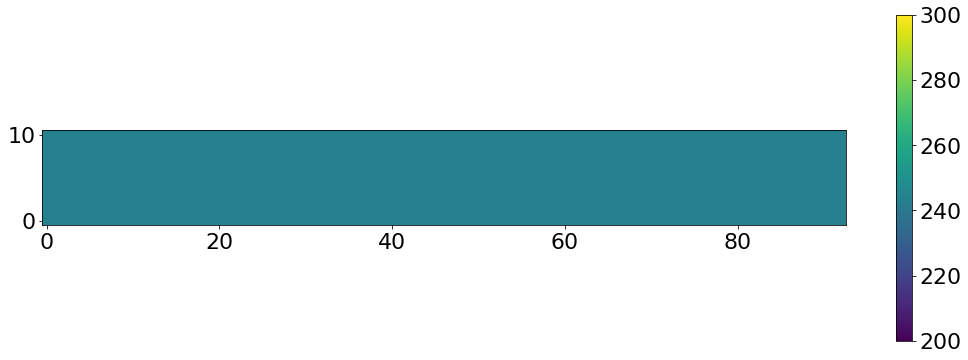

In [18]:
fig,axes = plt.subplots(1,1,figsize=(18,6))

# xl=-0.5,134.5
asp = 1
frame = 5800
cmax = 300
cmin = 200

cmap = mpl.cm.viridis
# norm = np.size(newmask)
cmap.set_bad('k',1.)

im = (((tpf.flux_bkg[frame,:,:])).T)

img = axes.imshow(im,cmap=cmap, vmin=np.nanmin(cmin),vmax=np.nanmax(cmax),
    interpolation='None',origin='lower',aspect=asp)

# axes[0].set_xlim(xl)
plt.colorbar(img, ax=axes)

We're going to choose 𝜏 Ceti as our example for background corrections because of a feature in the light curve noted by Eisner et al. (2019) https://ui.adsabs.harvard.edu/abs/2019RNAAS...3..145E/abstractWe're going to choose 𝜏 Ceti as our example for background corrections because of a feature in the light curve noted by Eisner et al. (2019) https://ui.adsabs.harvard.edu/abs/2019RNAAS...3..145E/abstract
plt.show()

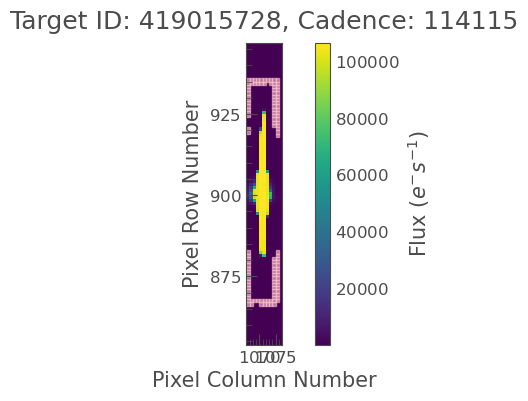

In [19]:
tpf.plot(aperture_mask = tpf.background_mask);

In [21]:
tpf.__class__ = tessbkgd.tessbkgd.bkgd_tpf

In [22]:
newbkgd = tpf.get_bkgd()

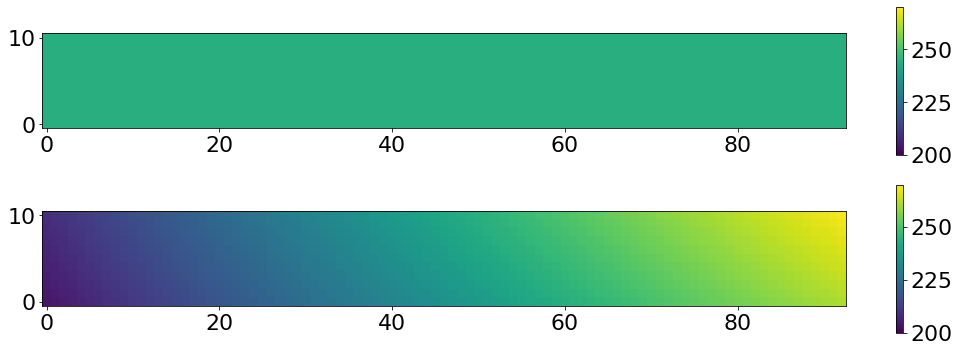

In [41]:
fig,axes = plt.subplots(2,1,figsize=(18,6))

frame = 5800
cmax = 200
cmin = 270

cmap = mpl.cm.viridis
cmap.set_bad('k',1.)
im = (((tpf.flux_bkg[frame,:,:])).T)
img = axes[0].imshow(im,cmap=cmap, vmin=np.nanmin(cmin),vmax=np.nanmax(cmax),
    interpolation='None',origin='lower',aspect=asp)
plt.colorbar(img, ax=axes[0])

im2 =  ((newbkgd[frame,:,:]).T)
img = axes[1].imshow(im2,cmap=cmap, vmin=np.nanmin(cmin),vmax=np.nanmax(cmax),
    interpolation='None',origin='lower',aspect=asp)
plt.colorbar(img, ax=axes[1])

plt.show()

In [24]:
tpf.flux = tpf.flux + tpf.flux_bkg - newbkgd
tpf.flux_bkg = newbkgd

In [25]:
from scipy.ndimage import binary_dilation

In [26]:
sapmask = tpf.create_threshold_mask(threshold = 50)
sapmask = binary_dilation(sapmask, iterations=3)

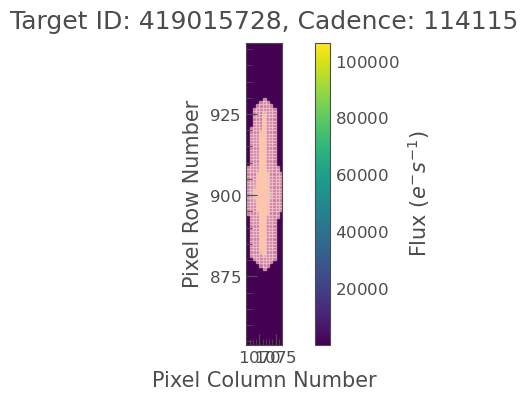

In [27]:
tpf.plot(aperture_mask=sapmask);

In [28]:
newlc = tpf.extract_aperture_photometry(aperture_mask=sapmask);

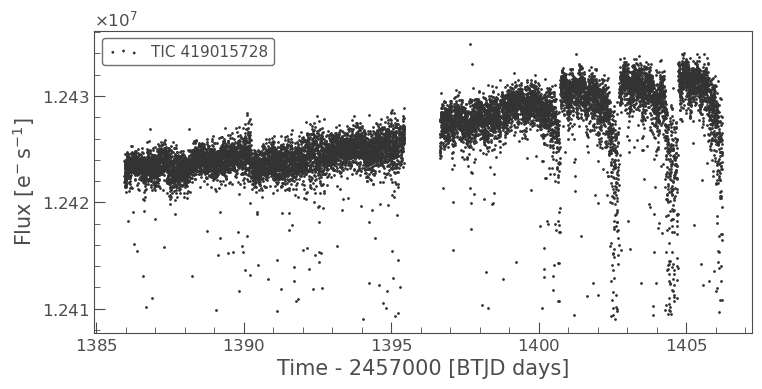

In [36]:
newlc.remove_outliers().scatter();

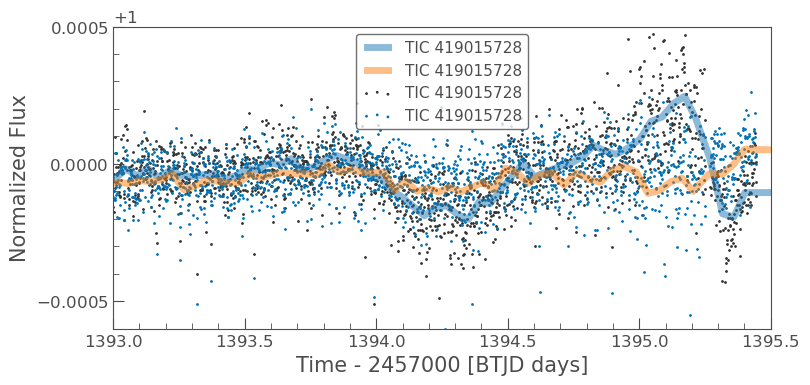

In [33]:
lc.PDCSAP_FLUX.normalize().scatter()
ax=plt.gca()

lc.PDCSAP_FLUX.normalize().bin(binsize=30).plot(ax=ax,linewidth=5,c='C0',alpha=0.5)

newlc.normalize().remove_outliers().scatter(ax=ax)
newlc.normalize().remove_outliers().bin(binsize=30).plot(ax=ax,linewidth=5,c='C1',alpha=0.5)

plt.xlim(1393,1395.5)
plt.ylim(0.9994,1.0005);

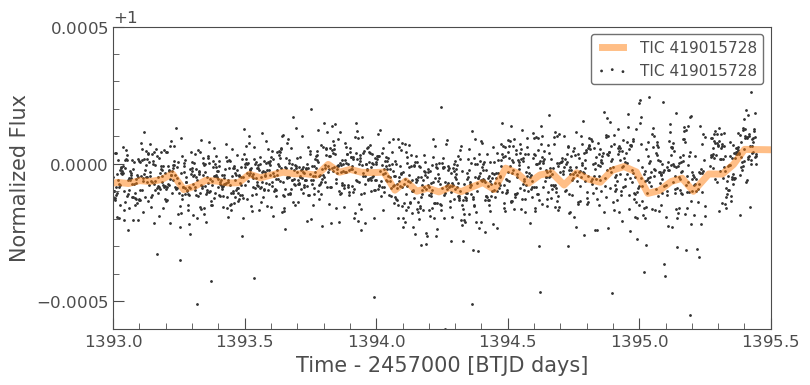

In [38]:
# lc.PDCSAP_FLUX.normalize().scatter()
# ax=plt.gca()

# lc.PDCSAP_FLUX.normalize().bin(binsize=30).plot(ax=ax,linewidth=5,c='C0',alpha=0.5)

newlc.normalize().remove_outliers().scatter()
ax=plt.gca()
newlc.normalize().remove_outliers().bin(binsize=30).plot(ax=ax,linewidth=5,c='C1',alpha=0.5)

plt.xlim(1393,1395.5)
plt.ylim(0.9994,1.0005);

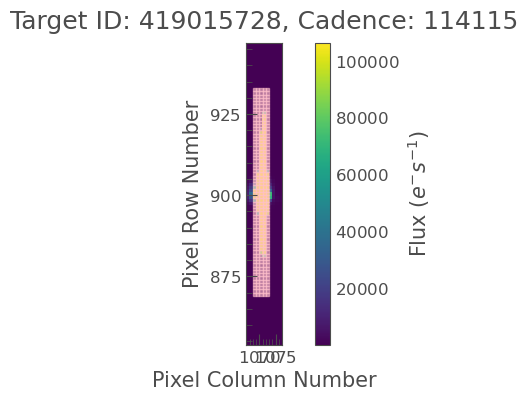

In [35]:
tpf.plot(aperture_mask=tpf.pipeline_mask)